# Get Ratings List

In [122]:
import csv
import tensorflow as tf
tf.enable_eager_execution()

def get_ratings_list(log_path, name_index=1, label_index=2, sort=True):
    
    ratings_list = []
    
    already_included = []
    
    with open(log_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')

        row_count = 0

        for row in csv_reader:
            
            # ignore column name row
            if (row_count != 0):
                
                if (int(row[label_index]) > 2):
                    ratings_list.append([row[name_index], 3])
                else:
                    
                    ratings_list.append([row[name_index], int(row[label_index])])

            row_count = row_count + 1
    
    if (sort):
        ratings_list = sorted(ratings_list, key=(lambda x: x[0]))    
    
    return ratings_list

def get_indexed_ratings(log_path, name_index=1, label_index=2, sort=True):

    ratings = get_ratings_list(log_path, name_index=name_index, label_index=label_index, sort=sort)
    
    ratings_indexed = lst = [[] for _ in range(4)]

    for rating in ratings:

        ratings_indexed[rating[1]].append(rating[0])

    return ratings_indexed



def display_cm(y1, y2, title="inter-rater variability", axis_titles=["y1", "y2"], ck=True, remove_unlabeled=True):
    cm = tf.confusion_matrix(y1, y2)
    cm = tf.to_float(cm)
    cm = cm/len(y1)
    
    cm = cm.numpy()
    
    # row_sums = cm.sum(axis=1)
    # cm = cm / row_sums[:, np.newaxis]

    if (remove_unlabeled):
        
        cm = cm[0:3, 0:3]
        df_cm = pd.DataFrame(cm, range(3), range(3))
        
    else:
        df_cm = pd.DataFrame(cm, range(4), range(4))

    #plt.figure(figsize = (10,7))

    sns.set(font_scale=1)#for label size

    cohen_kappa = sklearn.metrics.cohen_kappa_score(y1, y2)

    if (ck):
        plt.suptitle(title + " (k: " + str('%.3f'%(cohen_kappa)) + ")")
    else:
        plt.suptitle(title)

    ax = sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
    ax.set(xlabel=axis_titles[1], ylabel=axis_titles[0])
    plt.show()

# Inter-rater Variability (Fellows) (Peter vs. Ali)

[['IM-0001-0001-0001.dcm', 1], ['IM-0001-0002-0001.dcm', 1], ['IM-0001-0003-0001.dcm', 2], ['IM-0001-0004-0001.dcm', 1], ['IM-0001-0005-0001.dcm', 1], ['IM-0001-0006-0001.dcm', 1], ['IM-0001-0007-0001.dcm', 1], ['IM-0001-0008-0001.dcm', 1], ['IM-0001-0009-0001.dcm', 1], ['IM-0001-0010-0001.dcm', 1], ['IM-0001-0011-0001.dcm', 1], ['IM-0001-0012-0001.dcm', 1], ['IM-0001-0013-0001.dcm', 1], ['IM-0001-0014-0001.dcm', 1], ['IM-0001-0015-0001.dcm', 1], ['IM-0001-0016-0001.dcm', 1], ['IM-0001-0017-0001.dcm', 2], ['IM-0001-0018-0001.dcm', 1], ['IM-0001-0019-0001.dcm', 1], ['IM-0001-0020-0001.dcm', 1]]
[['IM-0001-0001-0001.dcm', 2], ['IM-0001-0002-0001.dcm', 1], ['IM-0001-0003-0001.dcm', 1], ['IM-0001-0004-0001.dcm', 1], ['IM-0001-0005-0001.dcm', 1], ['IM-0001-0006-0001.dcm', 1], ['IM-0001-0007-0001.dcm', 1], ['IM-0001-0008-0001.dcm', 1], ['IM-0001-0009-0001.dcm', 1], ['IM-0001-0010-0001.dcm', 1], ['IM-0001-0011-0001.dcm', 1], ['IM-0001-0012-0001.dcm', 1], ['IM-0001-0013-0001.dcm', 1], ['IM-000

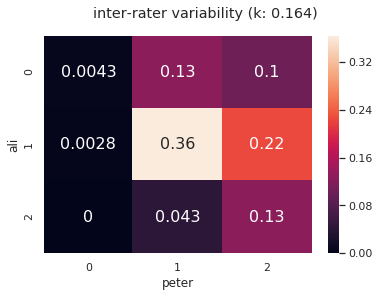

In [123]:

%matplotlib inline

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics


log_path_ali = "./data/logs/ratings_ali.csv"
log_path_peter = "./data/logs/ratings_peter.csv"

ratings_ali = get_ratings_list(log_path_ali, label_index=3)
ratings_peter = get_ratings_list(log_path_peter, label_index=3)

print(ratings_ali[:20])
print(ratings_peter[:20])

print(len(ratings_ali))
print(len(ratings_peter))

#check if length of two 2d arrays are the same

ali_labels = [rating[1] for rating in ratings_ali]
peter_labels = [rating[1] for rating in ratings_peter]


print(len(ali_labels))
print(len(peter_labels))

display_cm(ali_labels, peter_labels, axis_titles=["ali", "peter"])

# Techs vs. Fellows

In [124]:

%matplotlib inline

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics



tech_log_paths = [
    "./data/logs/techs/log_chmr2.csv",
    "./data/logs/techs/log_chmr3.csv",
    "./data/logs/techs/log_chmr4.csv", 
]

processed_dicoms = []
ratings_techs = []

for log_path in tech_log_paths:

    rater = get_ratings_list(log_path, label_index=3)

    for elem in rater:

        if (elem[0] in processed_dicoms):
            print("collision: " + str(elem[0]))

        else:
            
#             print([elem[0], elem[1]-1])
            ratings_techs.append([elem[0], elem[1] - 1])
            processed_dicoms.append(elem[0])

print(len(ratings_techs))

ratings_techs = sorted(ratings_techs, key=(lambda x: x[0]))

print(ratings_techs[:10])
print(processed_dicoms[:10])


collision: IM-0004-0006-0001.dcm
collision: IM-0004-0009-0001.dcm
collision: IM-0005-0006-0001.dcm
collision: IM-0006-0008-0001.dcm
collision: IM-0007-0013-0001.dcm
collision: IM-0013-0020-0001.dcm
collision: IM-0014-0017-0001.dcm
collision: IM-0016-0022-0001.dcm
collision: IM-0025-0018-0001.dcm
collision: IM-0025-0018-0001.dcm
collision: IM-0025-0020-0001.dcm
collision: IM-0028-0002-0001.dcm
collision: IM-0030-0022-0001.dcm
collision: IM-0031-0006-0001.dcm
collision: IM-0036-0007-0001.dcm
collision: IM-0038-0011-0001.dcm
collision: IM-0038-0011-0001.dcm
collision: IM-0038-0022-0001.dcm
collision: IM-0049-0003-0001.dcm
collision: IM-0053-0014-0001.dcm
collision: IM-0059-0001-0001.dcm
collision: IM-0061-0028-0001.dcm
collision: IM-0062-0003-0001.dcm
collision: IM-0065-0030-0001.dcm
collision: IM-0068-0018-0001.dcm
collision: IM-0069-0008-0001.dcm
collision: IM-0069-0008-0001.dcm
collision: IM-0069-0008-0001.dcm
collision: IM-0069-0008-0001.dcm
collision: IM-0069-0008-0001.dcm
collision:

## Fellow (Ali) vs. Techs

750
750


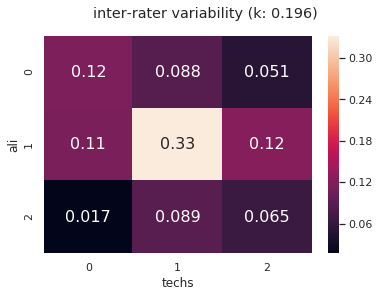

In [125]:

log_path_ali = "./data/logs/ratings_ali.csv"

ratings_ali = get_ratings_list(log_path_ali)

ali_instersect = sorted([elem for elem in ratings_ali if elem[0] in processed_dicoms], key=get_first)

ali_intersect_labels = [rating[1] for rating in ali_instersect]
tech_labels = [rating[1] for rating in ratings_techs]

print(len(ali_intersect_labels))
print(len(tech_labels))

display_cm(ali_intersect_labels, tech_labels, axis_titles=["ali", "techs"])


## Fellow (Peter) vs. Techs

750
750


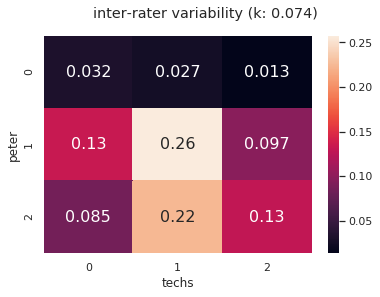

In [126]:
log_path_peter = "./data/logs/ratings_peter.csv"

ratings_peter = get_ratings_list(log_path_peter)

peter_instersect = sorted([elem for elem in ratings_peter if elem[0] in processed_dicoms], key=get_first)

# peter_intersect_ratings = []
# already_added = []

# for elem in ratings_peter:
#     if (elem[0] in processed_dicoms and elem[0] not in already_added):
#         already_added.append(elem[0])
#         peter_intersect_ratings.append(elem)

# peter_intersect_ratings = sorted(peter_intersect_ratings, key=get_first)


# TEMP FIX NEED TO FIGURE OUT WHY HE HAS EXTRA NUMBER OF VALUES
peter_intersect_labels = [rating[1] for rating in peter_instersect][:750]

tech_labels = [rating[1] for rating in ratings_techs]

print(len(peter_intersect_labels))
print(len(tech_labels))

display_cm(peter_intersect_labels, tech_labels, axis_titles=["peter", "techs"])

# Jaccard Index

0.18198529411764705
0.26229508196721313
0.07272727272727272
0.019711902956785442
0.40125
0.336402701043585
0.0
0.044194756554307116
0.3029411764705882


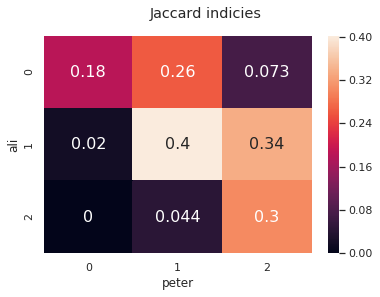

In [132]:
log_path_ali = "./data/logs/ratings_ali.csv"
log_path_peter = "./data/logs/ratings_peter.csv"

ratings_ali_indexed = get_indexed_ratings(log_path_ali)
ratings_peter_indexed = get_indexed_ratings(log_path_peter)

rater1_ratings = ratings_ali_indexed
rater2_ratings = ratings_peter_indexed

title = "Jaccard indicies"
axis_titles = ["ali","peter"]

jaccard_cm = []

for rater1 in range(3):
    
    rater1_row = []
    
    for rater2 in range(3):
        
        numerator = float(len([file for file in rater2_ratings[rater2] if file in rater1_ratings[rater1]]))
        
        denominator = len(ratings_ali_indexed[rater1]) + len(ratings_peter_indexed[rater2]) - numerator
        
        print(str(numerator/denominator))
        
        rater1_row.append(numerator/denominator)
        
    jaccard_cm.append(rater1_row)
        

df_cm = pd.DataFrame(jaccard_cm, range(3), range(3))

#plt.figure(figsize = (10,7))

sns.set(font_scale=1)#for label size

plt.suptitle(title)

ax = sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
ax.set(xlabel=axis_titles[1], ylabel=axis_titles[0])
plt.show()
        
